In [ ]:
!pip install mglearn

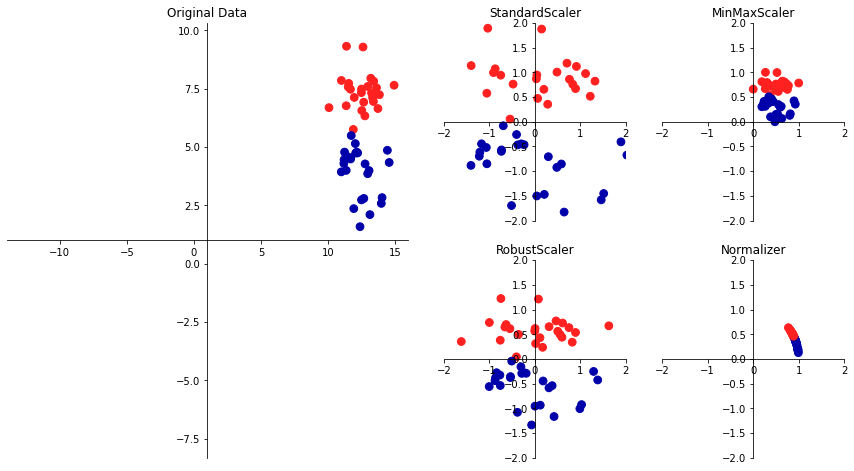

In [ ]:
import mglearn
mglearn.plots.plot_scaling()

# StandardScaler
* 평균을 0으로, 분산을 1로 변경해서 모든 특성이 같은 크기를 가지게 한다.
* 최솟값과 최댓값의 크기를 제한하지는 않는다.

$$
\frac{x-\bar{x}}{\sigma}
$$

* $x$ : 특성의 값
* $\bar{x}$ : $x$의 평균
* $\sigma$ : 표준편차

이 결과를 z-score 라고도 한다.

# RobustScaler
* StandardScaler와 비슷하게 특성들이 같은 스케일을 갖게 된다.
* 평균과 분산 대신 중앙값(median, q2)과 사분위 값을 사용한다.
* 중간값(median)이란?
  * $x$보다 작은 수가 절반이고, $x$보다 큰 수가 절반인 $x$

$$
\frac{x-q_{2}}{q_{3} - q_{1}}
$$

* $q_1$ : $x$보다 작은 수가 전체 개수의 $\frac{1}{4}$ - 25%
* $q_3$ : $x$보다 큰 수가 전체 개수의 $\frac{1}{4}$ - 75%

# MinMaxScaler
* 모든 특성이 정확하게 0 ~ 1사이의 위치하도록 데이터를 변형
* 2차원 데이터 세트라면? $x$축의 0 ~ 1, $y$축의 0 ~ 1 사각형 모양안에 데이터 포인트가 배치

$$
\frac{x-x_{min}}{x_{max} - x_{min}}
$$

# Normalizer
* 특성 벡터의 유클라디안 거리가 1이 되도록 데이터 포인트를 배치
  * 원점을 중심으로 하는 반지름의 길이가 1인 원의 호 위에 데이터포인트를 배치
* StandardScaler, MinMaxScaler, RobustScaler와 매우 다른 정규화 기법
* 벡터의 크기 (데이터의 크기)와는 상관 없고 데이터의 방향( 또는 각도 )이 중요할 때 사용

# 유방암 데이터셋 - SVM 으로 스케일링 효과 확인하기

## Scaler 사용해 보기

### 1. 데이터 준비

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'],
    cancer['target'],
    random_state=1
)

X_train.shape, X_test.shape

((426, 30), (143, 30))

### 2. 스케일러 사용하고 원본과 비교

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [ ]:
# 각 특성마다의 최소, 최대값을 계산해 준다.
minmax_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# 실제 변환은 transform!
X_train_scaled = minmax_scaler.transform(X_train)

**원본 데이터와 비교해보기**

In [ ]:
print("스케일 조정 전 특성별 최소값 : \n{}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값 : \n{}".format(X_train.max(axis=0)))

print("스케일 조정 후 특성별 최소값 : \n{}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값 : \n{}".format(X_train_scaled.max(axis=0)))

스케일 조정 전 특성별 최소값 : 
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값 : 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값 : 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 : 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


훈련 데이터를 바꿨으니까 테스트 데이터도 스케일링

In [ ]:
X_test_scaled = minmax_scaler.transform(X_test)

print("스케일 조정 후 테스트 세트의 특성별 최소값 \n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 테스트 세트의 특성별 최대값 \n{}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 테스트 세트의 특성별 최소값 
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 테스트 세트의 특성별 최대값 
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


$$
\frac{X_{test} - X_{train-min}}{X_{train-max} - X_{train-min}}
$$

### 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하면??
* 훈련 세트를 이용해서 스케일러를 만들고, 테스트 세트를 이용해서 새로운 스케일러를 만들면?
* 훈련 세트를 이용해서 만든 스케일러를 테스트 세트에도 적용시키면?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

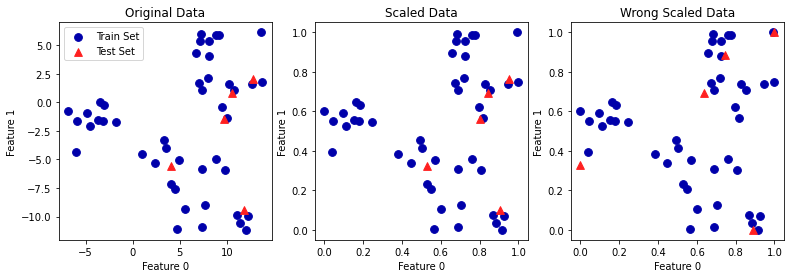

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# 인위적인 데이터 생성하기
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나누기
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도 그리기
fig, axes = plt.subplots(1,3,figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Train Set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1],c=mglearn.cm2(1), label="Test Set", s=60, marker='^')
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScaler를 사용해 스케일 조정하기
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도 그리기
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Train Set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=mglearn.cm2(1), label="Test Set", s=60, marker='^')
axes[1].set_title("Scaled Data")


# 테스트 세트의 스케일을 따로 조정하기
# 테스트 세트의 최솟값은 0, 최댓값이 1이 됨
# 절대로 이렇게 사용하지 말것!

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도 그리기
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Train Set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], 
                                    marker='^', c=mglearn.cm2(1), label="Test Set", s=60)
axes[2].set_title("Wrong Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

항상 스케일러는 TRAIN DATA SET로만 만들자! TEST DATA SET 으로 만들면 원본 데이터의 분포가 깨져버린다.

## 지도학습에서 데이터 전처리 효과

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'],
    cancer['target'],
    random_state=0
)

svm = SVC()
svm.fit(X_train, y_train)
print("테스트 세트의 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트의 정확도 : 0.94


스케일 조정 하고 확인

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도 : 0.97
